<a href="https://colab.research.google.com/github/HAN-GEONHUI/test/blob/t_academy_%EC%88%98%EC%97%85/06_%EC%A0%95%EB%A0%AC_%ED%8C%8C%EC%9D%BC%EC%A0%95%EB%A6%AC_240812_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ref)
# https://programmers.co.kr/learn/courses/30/lessons/17686?language=python3

In [ ]:
# 참고) 정규식!!! ==> 문자열에 대한 패턴 /규칙!!!!

In [ ]:
# 문제 상황을 체크
# 기존 정렬 방식 : 글자별로 코드값을 기준으로 정렬!!!
#                  -> img10.png , img2.png
#                   ===> img2.png, img10.png
#                  (숫자 덩어리의 대소를 반영!!!)
# 파일명 : 영문대소문자, 숫자, 공백, 마침표, 빼기
#         전제조건 : 시작(무조건 영문자)
#                    숫자는 무조건 1개 이상!!!!!!

# 파일명 ---> 3가지 파트로 정리!!!!
# head : 처음부터 ~~ 처음 숫자가 나타나기 전까지
# number : 처음 숫자 덩어리 파트( 제로 패딩 010 )
# tail : 그 외...

# 위의 3가지 정보들을 중심으로 정렬의 기준!!
# 기준1) head + 사전순(오름차순)
#        단, 대소문자는 구별X : 통일이 필요함(대 or 소)
# 기준2) number 숫자 크기(오름차순)
#        단, zero padding 앞 처리!! 00010--> 10
# 기준3) 원본의 순서를 유지해주세요!!!!
# ---> tail은 정렬에 안 쓰네;;
# ===> tail에 대한 정보는 정렬하는 기준에서는 필요가 없네!!!
# ===> 정렬시 필요한 정보 : 원본의 순서!!!

# 주관적인 결론)
# 정렬에 필요한 정보 ( head, number, 원본순서 )
# +
# (원본파일명, head, number, 원본순서) 등등등.....

In [ ]:
ord("A")

65

In [ ]:
ord("a")

97

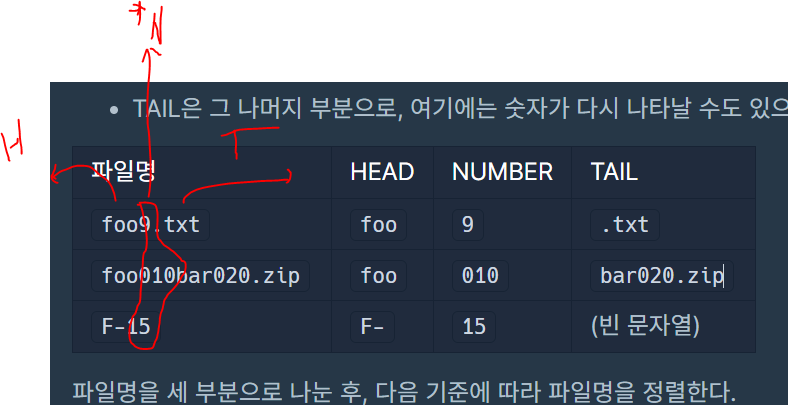

In [ ]:
# 샘플 케이스 분석
# 입력: ["img12.png", "img10.png", "img02.png",
#         "img1.png", "IMG01.GIF", "img2.JPG"]

# 1) 필요한 정보 추출 : head, number, 원본순서 ,,,,
"img12.png" : img, 12, 0   (6)
"img10.png" : img, 10, 1   (5)
"img02.png" : img, 02, 2   (3)
"img1.png"  : img, 1 , 3   (1)
"IMG01.GIF" : IMG, 01, 4   (2)
"img2.JPG"  : img, 2, 5    (4)
# ==> 출력 양식 : 내가 정리한 정보X
#                 입력으로 받은 원본 파일명을 그대로 순서만
#                 문제에서 제시한대로 체크해서 출력!!!!
# 방법1) 위에 필요한 정보들을 모으는 과정에서 원본파일명
#        ("img", 12,0,"img12.png")
# 방법2) 그냥 위에서 한 대로 하면,,,
#         files[3], files[4] .,..정수인덱스로 처리
# 기타 등드으.........: 원본 파일명 순으로 출력!!!!


In [ ]:
# 예시2
# ["F-5 Freedom Fighter", "B-50 Superfortress",
#      "A-10 Thunderbolt II", "F-14 Tomcat"]

# ("F-",5,0)      3
# ("B-", 50, 1)   2
# ("A-",10, 2)    1
# ("F-", 14, 3)   4


In [ ]:
# 정렬에 필요한 정보들을 어떻게 추출할까!!!!!
# --> 기준 : 파일명 속에 처음 나타나는 숫자!!!!!!(숫자5글자 0~9)
# --> 기준앞 : head
# --> 기준 : number
# ==> 파일명 : 문자열 + 규칙을 찾는 문법(정규식!!!!)
# ==> 잡다한 문자열/리스트의 기능 : 문자열의 앞의 head,
#                                   문자열에서 기준이 어디서시작하는지

# 정규식) 텍스트 데이터를 처리하는 곳에서는 필수!!!!
#         데이터 분석 : 데이터를 수집하는 과정 필수!!
#         --> Dart 사이트 공시 정보 수집할 때

In [ ]:
# 사전 지식1) 정규식!
# 목적 : 문자열에서 내가 원하는 패턴을 찾는 룰(규칙!!!)
# --> 일반적인 모든 언어들이 다 존재!!!
#     큰 틀에서는 정규식이 다 비슷하지만, 조금 언어별로 차이는 있음.
# --> 파이썬 : re패키지( 코테 플랫폼 : 기본으로 쓸 수 있는 패키지)

In [ ]:
import re
# --> anaconda 패키지에도 기본 설치가 되어 있고
#     colab도 기본으로 설치가 되어 있음.
# ==> 불러오기만 하면 됨!!!(단, 쌩 파이썬 이 패키지 다운로드 -> 불러와야 지만)

In [ ]:
# 정규식의 규칙으로 작성된 문자열 vs 쌩파이썬의 문자열
"hello. 100$" # -- 일반적인 문자열
r"hello. 100$" # -- 일반문자열 앞에 r을 추가하면,
# ==> 일반 문자열이 아니라 정규식으로 작성된 문자열!!!!

# ==> . () \ []* 기호들이 일반적인 특수문자로 동작을 하는것이 아니라
#     정규식 패키지에서 정해놓은 룰을 나타내는 문자로 인식!!!

'hello. 100$'

In [ ]:
# 정규식 기본 룰
# * vs + : 원하는 패턴 0번 이상 vs 1번 이상 ==> 출현 빈도!!!!
# [문자들] : 여러문자들 중 하나라도.,.==> [Pp]ython
# . : 줄바꿈을 빼고 뭐라고 1개의 문자/공백
# {n} : 패턴 반복

In [ ]:
[0123456789] # 0~9까지 숫자 하나라고 체크!!!
[0-9]
\d == [0-9] # 편하게 숫자 1자리 \d but 구체적인 숫자는 컨트롤X
# 예) 주민번호 XXXXXX -[1-4]XXXXXX

In [ ]:
# 정규식에서 특정 패턴을 찾을 때
# ==> findall
re.findall( 패턴-->규칙(정규식룰), 어디서)

In [ ]:
temp = "Sssdasddasda8asdasdasd123232323****ssds1323.pfddfdfdfd"
temp

'Sssdasddasda8asdasdasd123232323****ssds1323.pfddfdfdfd'

In [ ]:
# ex) 찾을 규칙 : 숫자1개로 된 것들은 다 찾아주세요!!!!
re.findall(r"\d", temp)

['8', '1', '2', '3', '2', '3', '2', '3', '2', '3', '1', '3', '2', '3']

In [ ]:
# ex) 찾을 규칙 : 숫자1개 이상으로 연결되어 있는 것들 찾아주세요!!
re.findall(r"\d+", temp)

['8', '123232323', '1323']

In [ ]:
# \d+ 규칙이 아니라 \d*
re.findall(r"\d*", temp)
# ==> 꼭!!! 제대로 원하는 패턴들의 결과들이 잘 찾아지는지 체크!!!
#     간단하게라도 테스트!!!
# ==> 맞는 정보이기는 한데,,,,불필요한 정보들도 있어서 불편....

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '8',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '123232323',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '1323',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [ ]:
re.findall(r"[0123456789]+", temp)

['8', '123232323', '1323']

In [ ]:
re.findall(r"[0-9]+", temp)

['8', '123232323', '1323']

In [ ]:
re.findall(r"[8-9]+", temp)

['8']

In [ ]:
re.findall(r"[a-z]+", temp) # 소문자 1개 이상 연속 패턴

['ssdasddasda', 'asdasdasd', 'ssds', 'pfddfdfdfd']

In [ ]:
re.findall(r"[A-Z]+", temp) # 대문자 1개 이상 연속 패턴

['S']

In [ ]:
# [a-zA-Z], [A-z], [a-Z](X)
re.findall(r"[A-z]+", temp) # 대소문자 아무거라고 1개이상 패턴

['Sssdasddasda', 'asdasdasd', 'ssds', 'pfddfdfdfd']

In [ ]:
# 사전지식2) 숫자앞에서 붙은 0을 어찌 처리할까요?
# ===> 정렬 하기 위해서는 0이 제거된 숫자로 형이!!!!
# 000034(문자) ---> 숫자 34

In [ ]:
"000340"

In [ ]:
int("000340")

340

In [ ]:
str(int("000340"))

'340'

In [ ]:
# 사전 지식 1~2 조합 : temp 문자열에서 처리..
temp = "SSSaaas00321sdfddfdfFDFD22323sddsrsr.***.pmngf123"
temp

'SSSaaas00321sdfddfdfFDFD22323sddsrsr.***.pmngf123'

In [ ]:
re.findall(r"\d+", temp)

['00321', '22323', '123']

In [ ]:
re.findall(r"\d+", temp)[0]

'00321'

In [ ]:
# 문자열/리스트 언디에 처음으로 위치하는지 위치인덱스 :.index()
[1,3,3,3,5,5,4,4].index(3)

1

In [ ]:
"aaaabbdddsddddssss".index("s")

9

In [ ]:
temp.index( re.findall(r"\d+", temp)[0])

7

In [ ]:
temp[:temp.index( re.findall(r"\d+", temp)[0])]
# SSSaaas

'SSSaaas'

In [ ]:
# 사전지식3) 문자열 --> 정렬에서는 대소문자는 생략!!!!
# --> 문자열에서 대소문자 일괄변환
"AAnnnffDD".lower()

'aannnffdd'

In [ ]:
"AAnnnffDD".upper()

'AANNNFFDD'

In [ ]:
# 방법1) 리스트 사용해서 체크
#        --> ( head: 소문자, number:숫자, 원본위치)
#        --> (headm number, 원본위치, 원본 파일명,) [개인적 시도]

In [ ]:
def solution(files):
    answer = [] # 출력용...
    ####################################
    # 0) 기본적인 세팅 : 정렬에 필요한 정보를 담을 변수 : 리스트
    #     세팅 : ( head: 소문자, number:숫자, 원본위치)
    my_files = []
    # --> [(h, n,id), (h,n,id),.....]
    # 1) 큰 틀 : 입력으로 받은 files를 다 돌려가면서,,,
    #            내가 원하는 정보들을 추추하고, my_files담으면 됨!
    #            + 원본의 위치 정보/정수 인덱스
    for idx, s in enumerate(files): # files의 정수indx, file명
        # s개별 파일에서 h/n파트 정보 추출...
        # 1-1) 기준 : 가장 처음 나타나는 숫자 덩어리 찾기!!
        #      ==> 정규식 활용해서 추출!!!
        number = re.findall( r"\d+", s) # -->["0012","112",,]
        # 이 중에서 가장 처음 : 0번째 값 + 숫자로 처리
        real_number = int(number[0]) # "0012" --> int --> 12
        # ----> number 파ㅌ 정보 추출

        # 1-2) 앞 부분인 head 정보 추출 : 처음~~~숫자파트시작전
        head = s[:s.index(number[0])] # IMg012---> IMg
        head = head.lower()           # IMg  ----> img

        # 1-3) 정렬에 필요한 정보들을 다 모으자!!!
        my_files.append( [head, real_number, idx ])
        # ==> [ ["img", 12,0], ["iaa",3,1],,,,,,,,,]
    # ---> 입력으로 받은  files를 다 처리를 하고 나서!!!!!!

    # 2) 문제에서 주어진 조건대로 정렬
    #    + 일반적인 조건이 아니기에 내가 직접 작성!!!
    #    sort(), sorted()
    #    원본 파일명 files 변수에 그대로 있으니,,바로 변경..
    my_files.sort( key = lambda x : (x[0], x[1], x[2]))
    # [ ["iaa",3,1], ["img",12,0]]

    # 3) 최종 제출을 체크!!!!!원본 파일명 대로..
    # for j in my_files:
    #     # j : h, n, idx
    #     answer.append(files[j[2]] )
    answer = [ files[j[2]] for j in my_files]
    ####################################
    return answer

In [ ]:
#방법2) dict 사용해서 체크
#-> 무엇을 key, 무엇을 value
#my_files ={}
# --> key : 중복이 없는 경우!!!! --> 문제상 중복이 없는 원본파일명!
# --> value : 정렬하기 위한 정보들(head, number, org_idx)
# ==> 정렬을 할 때 기준은 어디에? 이 문제는 오로지 values만 존재
#     dict.items(), dict.values() etc.....

In [ ]:
import re

In [ ]:
def solution(files):
    answer = []
    #############################
    # 세팅 :
    my_files = {} # 모을내용: key(원본파일명),v(H,N,(ldx))
    #개별 입력 파일명들에 대한 처리
    for f in files:
      p = re.findall(r"\d+",f)[0]
      head = f[:f.index(p)].lower()
      number = int(p)
      my_files[f] = (head,number)
      #-->{"aa01.png":("aa",1),"a22.jpg":("a",2),,,,}
    #->dict에 필요한 정보들이 다 처리되어서 담김!
    #정렬
    file_list = my_files.items()
    #[("aa01.png",)("aa",1)),("a22".jpg:("a",2)),,,]
    #-->원본순서가 유지되면서 풀리는 것
    file_list = sorted(file_list,key=lambda x:(x[1][0],x[1],[1]))
    answer = [i[0] for i in file_list]
    ########
    return answer

In [ ]:
temp_dict = {}
temp_dict["aa"]=100
temp_dict["bb"]=200
temp_dict["a"]=300
temp_dict

{'aa': 100, 'bb': 200, 'a': 300}

In [ ]:
for i in temp_dict:
  print(i)

aa
bb
a


In [ ]:
#-->카카오 계열은 정규식 정도로 공부를 하고 가야함
#--> 정렬을 위한 정보들을 어떤 것들이 있는지 정의-> 스스로 해보기
#++정보들 구현/계산하는 과정이 좀 복잡/예외 처리
#(문제들을 정확하게 이해 &분석하는게 중요)
#--> 파이썬의 어떤 자료형으로 이 정보들을 핸들링할지 고민을 해보야 함!+ (정렬에 대한 나만의 기준 작성)
#참고) 최종 출력 양식까지 고려
#참고)연습 할 때에는 분석을 끝내고 자료형 선택에서는 기본 문제들에 대해서 다양한 자료형으로 시도해보기